# Modelos de Mezcla (Mixture Models)

Un modelo de mezcla combina varios modelos de componente para generar un modelo más complejo. Esto se expresa como una combinación ponderada de distribuciones condicionales. En este caso, \( p(v) \) es la distribución total que describe los datos observados, \( v \), y se calcula sumando las distribuciones condicionales \( p(v|h) \), donde \( h \) es una variable oculta (o latente) que indexa diferentes componentes en el modelo.

## Aplicación en Clustering

En el contexto de clustering, cada componente \( h \) puede interpretarse como un "cluster" y \( p(h) \) como la probabilidad de que un punto de datos pertenezca a ese cluster. Al generar un punto de datos \( v \), primero se selecciona un cluster \( h \) según \( p(h) \), y luego se genera el valor de \( v \) condicionado en \( h \).

## Modelo de Mezcla de Bernoulli Independientes

Este modelo es útil para clústeres de vectores binarios. Los datos \( v_n = (v_{n1}, \dots, v_{nD}) \) son vectores de variables binarias (0 o 1), y el modelo se puede describir como una mezcla de distribuciones de Bernoulli. El aprendizaje de este modelo se hace mediante el algoritmo de Expectation Maximization (EM), que ajusta los parámetros de las distribuciones \( p(v_i|h) \) y las probabilidades de los clusters \( p(h) \).

## Algoritmo EM

Expectation Maximization (EM) es un algoritmo iterativo utilizado para encontrar estimaciones de máxima verosimilitud en modelos estadísticos con variables latentes. Se compone de dos pasos:

- **E-step (Expectativa)**: Estima la probabilidad posterior de las variables latentes \( h \) dado los datos observados \( v_n \).
- **M-step (Maximización)**: Actualiza los parámetros del modelo para maximizar la esperanza de la log-verosimilitud, usando las probabilidades obtenidas en el paso anterior.

## Modelo de Mezcla Gaussiana

Un modelo de mezcla gaussiana combina varias distribuciones normales (Gaussianas), cada una con su propia media (\( m_i \)) y matriz de covarianza (\( S_i \)). Es útil para modelar datos continuos, como distribuciones de puntos en el espacio.

El modelo de mezcla gaussiana se expresa como una suma ponderada de distribuciones normales, y la tarea es estimar los parámetros de las componentes gaussianas, como las medias, las covarianzas y las probabilidades de mezcla \( p(i) \).

## Maximum Likelihood

La log-verosimilitud del modelo de mezcla gaussiana se maximiza mediante el algoritmo EM. En este caso, el E-step implica calcular la probabilidad de que cada dato pertenezca a cada componente gaussiano, y el M-step actualiza los parámetros de las distribuciones gaussianas para maximizar la log-verosimilitud.

## Optimización de los Parámetros

Para el M-step, se calculan las actualizaciones para las medias \( m_i \) y las matrices de covarianza \( S_i \). Las medias se actualizan ponderando los datos con las probabilidades posteriores de los clusters, mientras que las matrices de covarianza se actualizan mediante una fórmula que involucra las diferencias cuadradas entre los puntos de datos y las medias.

## K-Means y Cuantificación Vectorial

K-Means es una técnica de clustering que puede considerarse como un caso específico de un modelo de mezcla gaussiana con covarianzas isotrópicas (igual en todas las direcciones). A medida que la varianza \( \sigma^2 \) tiende a cero, el algoritmo se comporta como si asignara determinísticamente cada punto al centroide más cercano, lo que se conoce como cuantificación vectorial. Esto se utiliza comúnmente para compresión de datos, donde en lugar de almacenar el punto de datos original, se almacena el índice del centroide al que pertenece.

## Problemas y Soluciones

Uno de los problemas en el ajuste de modelos de mezcla de gaussianas es el sobreajuste o la "explosión" de la verosimilitud, especialmente cuando las gaussianas tienen varianzas muy pequeñas. Para evitar esto, se puede añadir una restricción en el ancho de las distribuciones gaussianas para evitar que se conviertan en "singulares" (con varianza cero).


In [1]:
import numpy as np
from sklearn.decomposition import PCA

Construimos el conjunto de datos. Se trata de 2000 documentos en los que aparecen 10 palabras. Cada vector pi (i=1,2,3,4) representa un tema, indicando la probabilidad de que la palabra correspondiente aparezca en un documento sobre ese tema.

In [2]:
p1 = np.array([0, 1, 0.8, 0.8, 0.7, 0.5]) # [influenza, flu, headache,nose,temperature,bed] probabilidad de ocurrir
p2 = np.array([1, 0, 0.8, 0.8, 0.7, 0.5]) # [influenza, flu, headache,nose,temperature,bed] probabilidad de ocurrir

p1 = np.concatenate((p1, 0.05*np.ones(4))) # añadir palabras aleatorias con pocas ocurrencias
p2 = np.concatenate((p2, 0.05*np.ones(4))) # añadir palabras aleatorias con pocas ocurrencias
p3 = 0.1*np.ones(p1.size) # tema de fondo aleatorio con pocas ocurrencias
p4 = np.array([0, 0.1, 0.1, 0.1, 0, 0.2, 0.8, 0.8, 0.9, 0.9]) # otro tema sobre 'mascotas'

D = p1.size # número de palabras en el diccionario
N = 500 # número de documentos a muestrear de cada tipo
rng1 = np.random.default_rng()
x1 = (rng1.random((D,N)).T < p1).T
x2 = (rng1.random((D,N)).T < p2).T
x3 = (rng1.random((D,N)).T < p3).T
x4 = (rng1.random((D,N)).T < p4).T

X = np.concatenate((x1, x2, x3, x4), axis=1) # incluye el tema de fondo
# las columnas de X corresponden a datos de entrada
X.shape

(10, 2000)

In [3]:
import matplotlib.pyplot as plt

Representamos gráficamente nuestro conjunto de datos. El negro indica la presencia de la palabra y el blanco su ausencia.

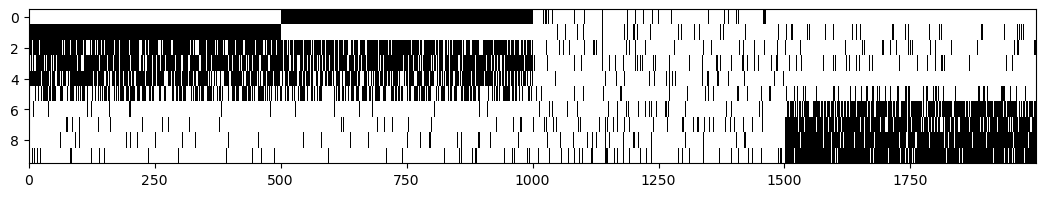

In [4]:
plt.figure(figsize = (13,2))
plt.imshow(X, aspect='auto', cmap='gray_r', interpolation='none')

## PCA (ejemplo 15.4)

Vamos primero a usar scikit-learn para calcular las componentes principales. Posteriormente, siguiendo el libro de Barber y puesto que no queremos utilizar el sesgo c, vamos a calcularlas directamente con la descomposición SVD.

In [5]:
pca = PCA(n_components = 3)
X2D = pca.fit_transform(X.T)
reducedX = X2D @ pca.components_ 

Representación gráfica de las aproximaciones de los documentos dadas por PCA.

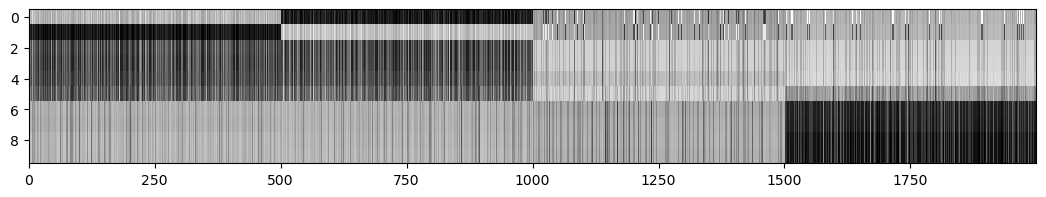

In [6]:
plt.figure(figsize = (13,2))
plt.imshow(reducedX.T, aspect='auto', cmap='gray_r', interpolation='none')

Proyecciones de los documentos en las tres componentes principales.

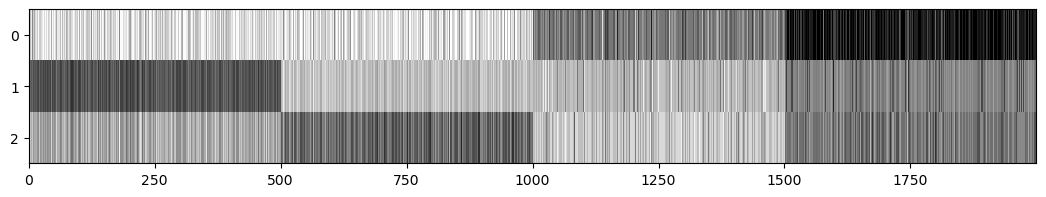

In [7]:
plt.figure(figsize = (13,2))
plt.imshow(X2D.T, aspect='auto', cmap='gray_r', interpolation='none')

Los resultados no son exactamente iguales a los del libro debido, primero, a la variabilidad del conjunto de datos, y segundo, porque la clase PCA de scikit-learn sí tiene en cuenta el sesgo. Se aprecia sobre todo en los autovalores (pca.explained_variance_).

(El siguiente código para dibujar diagramas de Hinton usando matplotli está copiado de la web.)

In [8]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log2(np.abs(matrix).max()))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

Calculamos directamente las componentes principales a través de la descomposición SVD. Para ello, siendo X = U * D * V.T, los autovectores vienen dados por U y sus pesos son el cuadrado de los elementos en la diagonal D divididos entre N-1. Si se quieren las k componentes principales, nos quedamos con las k primeras columnas de U y las coordenadas se obtienen multiplicando las k primeras columnas de D por las k primeras filas de V.T.

(Si se restara la media a X se obtendrían unos resultados similares a los anteriores con PCA.)

In [9]:
U, D, VT = np.linalg.svd(X) 
L = D**2 / 1999

In [10]:
U.shape

(10, 10)

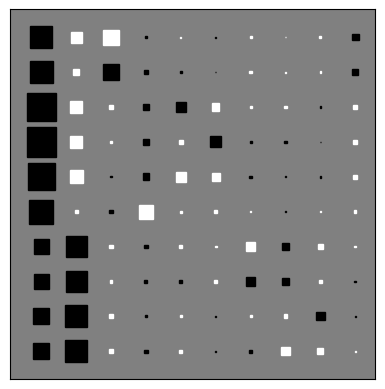

In [11]:
hinton((U[:,:] * L).T)

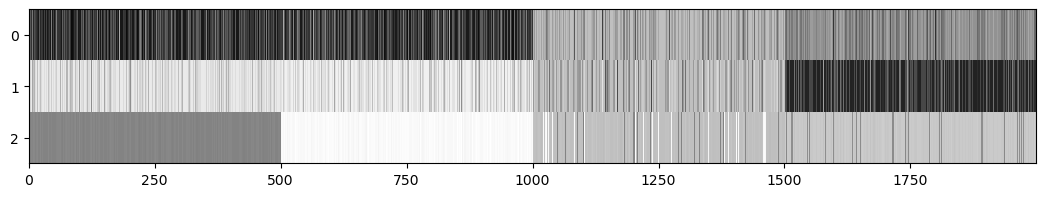

In [12]:
X2D = D[:3] * VT.T[:,:3]
plt.figure(figsize = (13,2))
plt.imshow(X2D.T, aspect='auto', cmap='gray', interpolation='none')

## PLSA (ejemplo 15.6)

Tenemos que implementar el algoritmo PLSA para el modelo x <- z -> y. Se trata simplemente del algoritmo 15.2, pero la vectorización y garantizar que se trabaja con distribuciones de probabilidad oscurecen en el código la idea básica. Ojo: la última línea del código debería aparecer como última línea dentro del bucle.

Por ejemplo, en el paso E hay que actualizar $q(z|x,y)$ igualándolo a $\tilde{p}(z|x,y)$. Este último es un valor que no tenemos directamente, pero durante el algoritmo sí vamos calculando $\tilde{p}(x|z)$, $\tilde{p}(y|z)$ y $\tilde{p}(z)$. Combinándolos, de acuerdo al modelo con el que estamos trabajando se tiene que $\tilde{p}(z|x,y)$ es esencialmente $\tilde{p}(x|z)\tilde{p}(y|z)\tilde{p}(z)$; solo faltaría dividir entre $\tilde{p}(x,y)$ para normalizar (y no resulta necesario calcular $\tilde{p}(x,y)$ para la normalización).

In [13]:
def plsa(pxy, Z, opts):
    """    
    PLSA Probabilistic Latent Semantic Analysis
    [tpxgz,tpygz,tpz,tpxy]=plsa(pxy,Z,opts)

    Entrada:
    pxy : matriz con las frecuencias p(x,y)
    Z : dimensión latente/oculta
    opts: diccionario con parámetros adicionales
    opts.maxit : número máximo de iteraciones
    opts.tol : tolerancia para converger
    opts.randinit : vale 1 para una inicialización aleatoria -- en caso contrario, toma
     los valores de opts.tpxgz, opts.tpygz, opts.tpz

    Salida:
    tpxgz : aproximación de p(x|z)
    tpygz : aproximación de p(y|z)
    tpz : aproximación de p(z)
    tpxy : aproximación de p(x,y)
    """

    # Cardinales de los conjuntos subyacentes.
    X = pxy.shape[0]
    Y = pxy.shape[1]

    # Inicialización.
    if opts["randinit"] == 1:
        rng = np.random.default_rng()
        tpz = rng.random(Z)
        tpz = tpz/tpz.sum() # Garantizamos que sea distribución de probabilidad
        tpxgz = rng.random((X,Z))
        tpxgz = tpxgz / tpxgz.sum(axis=0) # Para que sea distribución de probabilidad
        tpygz = rng.random((Y,Z))
        tpygz = tpygz / tpygz.sum(axis=0) # Para que sea distribución de probabilidad
    else:
        tpz = opts["tpgz"]
        tpxgz = opts["tpxgz"]
        tpygz = opts["tpygz"]

    eps = 0.0000001  # para evitar divisiones entre cero
    L = np.zeros(opts["maxit"]) # para guardar la verosimilitud
    qzgxy = np.zeros((Z,X,Y))
    for emloop in range(opts["maxit"]):
        tpxy = np.zeros((X,Y))
        for z in range(Z):
            #Porque el modelo es x <- z -> y
            tpxy = tpxy + tpxgz[:,z].reshape(X,1) @ tpygz[:,z].reshape(1,Y) * tpz[z]
            
        L[emloop] = np.sum(pxy * np.log(tpxy+eps)) # log `verosimilitud', ecuación (15.6.5)

    	# Paso E:
        for z in range(Z): # qzgxy es proporcional a tpxgz * tpygz * tpz (dada en el enunciado)
            qzgxy[z,:,:] = tpxgz[:,z].reshape(X,1) @ tpygz[:,z].reshape(1,Y) * tpz[z] + eps 
            # En vez de sumar eps aquí, una alternativa sería sumarlo en el 
            # divisor al hacer la normalización. Al hacerlo aquí, se evita que haya probabilidades
            # que sean 0, que podría interesar o no según el contexto.

        # Normalizar 
        qzgxy = qzgxy / np.sum(qzgxy, axis=0) 
        
        # Paso M:
        for z in range(Z):
            tpxgz[:,z] = np.sum(pxy * qzgxy[z,:,:],axis=1)
            tpygz[:,z] = np.sum(pxy * qzgxy[z,:,:],axis=0)

        tpz = np.sum(tpxgz, axis=0) # ver fórmulas (15.6.11) y (15.6.13)
        # Normalizar
        tpxgz = tpxgz / np.sum(tpxgz, axis=0)
        tpygz = tpygz / np.sum(tpygz, axis=0)
        
        if emloop > 1:
            if np.abs(L[emloop] - L[emloop-1]) < opts["tol"]:
                print(emloop)
                print(L)
                break        

    return tpxgz, tpygz, tpz, tpxy

In [14]:
opts = {"tol" : 0.0000001,
        "maxit" : 2000,
        "randinit" : 1
       }

### PLSA con dos componentes

Con PLSA, la selección de componentes no es secuencial. El tema principal cuando el número de componentes es 2 seguramente sea distinto del tema principal con 3 componentes. Se verá en las pruebas siguientes.

36
[-10.12329244  -9.68545783  -9.6447673  ...   0.           0.
   0.        ]


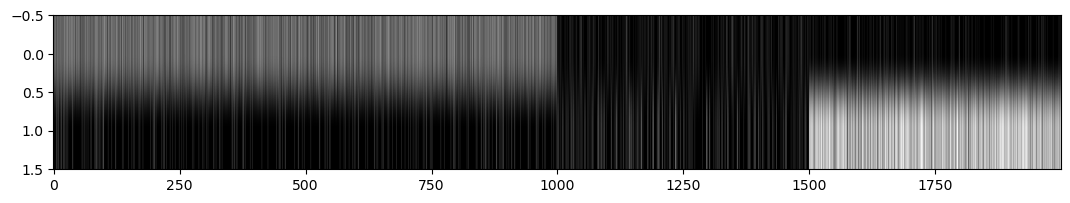

In [15]:
tpxgz, tpygz, tpz, tpxy = plsa((X / np.sum(X)), 2, opts)
plt.figure(figsize = (13,2))
plt.imshow(tpygz.T, aspect='auto', cmap='gray')

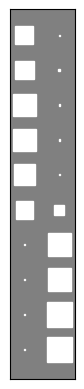

In [16]:
# Palabras según el tema
hinton(tpxgz.T)

### PLSA con tres componentes

115
[-10.11482611  -9.69005379  -9.6679035  ...   0.           0.
   0.        ]


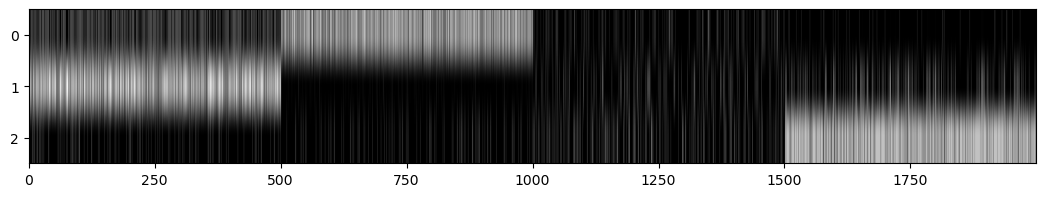

In [17]:
tpxgz, tpygz, tpz, tpxy = plsa((X / np.sum(X)), 3, opts)
plt.figure(figsize = (13,2))
plt.imshow(tpygz.T, aspect='auto', cmap='gray')

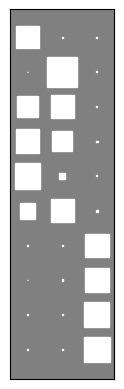

In [18]:
# Palabras según el tema. Tener 3 componentes permite distinguir documentos que continen
# "influenza" de los que tienen "flu".
hinton(tpxgz.T)